In [ ]:
#1.Import thee Requirement Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
#2.Set Parameters and Paths
dataset_path = "E:/Plant-Disease-Detection/PlantVillage"  # change if needed
img_height, img_width = 64, 64
batch_size = 32
epochs = 10

In [ ]:
#3.Load and Preprocess the dataset
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 33027 images belonging to 16 classes.
Found 8249 images belonging to 16 classes.


In [ ]:
#4.Simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │         1,040 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 204,880 (800.31 KB)

 Trainable params: 204,880 (800.31 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Train the Model
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=3,
    callbacks=[early_stop]
)

Epoch 1/3
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 509s 493ms/step - accuracy: 0.4994 - loss: 1.9176 - val_accuracy: 0.3613 - val_loss: 1.6169
Epoch 2/3
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 167s 161ms/step - accuracy: 0.5158 - loss: 1.3865 - val_accuracy: 0.2746 - val_loss: 1.6431
Epoch 3/3
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 168s 162ms/step - accuracy: 0.5285 - loss: 1.2050 - val_accuracy: 0.2114 - val_loss: 1.8958


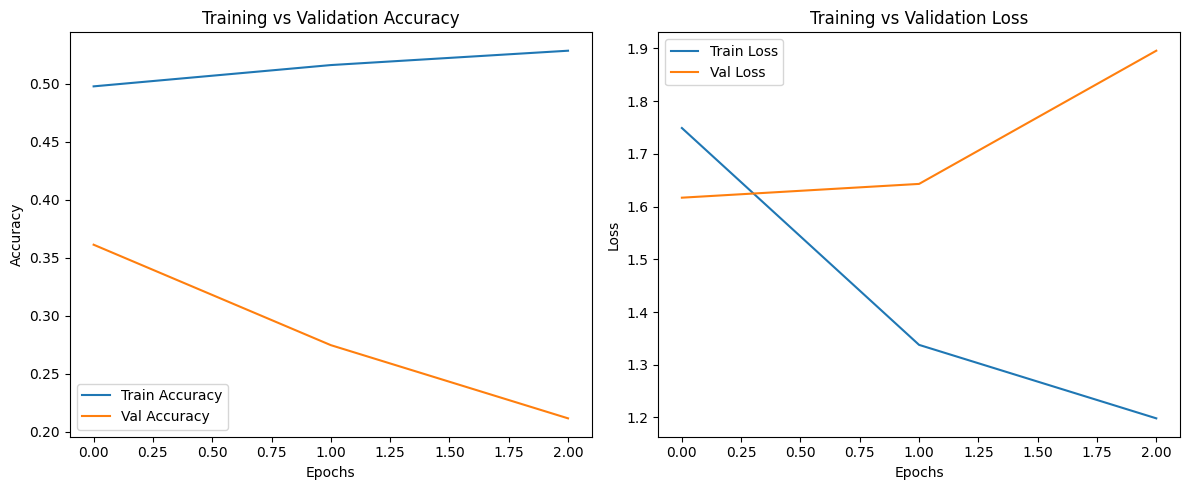

In [ ]:
#Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
random_seed = 111

categories = os.listdir(dataset_path)
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'PlantVillage', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus'] 

No. of categories =  16


In [29]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (4352, 227, 227, 3) 
Labels shape =  (4352,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [17]:
print(train_data.class_indices)

{'Pepper__bell___Bacterial_spot': 0, 'Pepper__bell___healthy': 1, 'PlantVillage': 2, 'Potato___Early_blight': 3, 'Potato___Late_blight': 4, 'Potato___healthy': 5, 'Tomato_Bacterial_spot': 6, 'Tomato_Early_blight': 7, 'Tomato_Late_blight': 8, 'Tomato_Leaf_Mold': 9, 'Tomato_Septoria_leaf_spot': 10, 'Tomato_Spider_mites_Two_spotted_spider_mite': 11, 'Tomato__Target_Spot': 12, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 13, 'Tomato__Tomato_mosaic_virus': 14, 'Tomato_healthy': 15}


258/258 ━━━━━━━━━━━━━━━━━━━━ 26s 98ms/step
Classification Report:
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.00      0.00      0.00       199
                     Pepper__bell___healthy       0.04      0.06      0.05       295
                               PlantVillage       0.50      0.79      0.61      4127
                      Potato___Early_blight       0.03      0.17      0.05       200
                       Potato___Late_blight       0.00      0.00      0.00       200
                           Potato___healthy       0.00      0.00      0.00        30
                      Tomato_Bacterial_spot       0.00      0.00      0.00       425
                        Tomato_Early_blight       0.00      0.00      0.00       200
                         Tomato_Late_blight       0.00      0.00      0.00       381
                           Tomato_Leaf_Mold       0.00      0.00      0.00       19

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

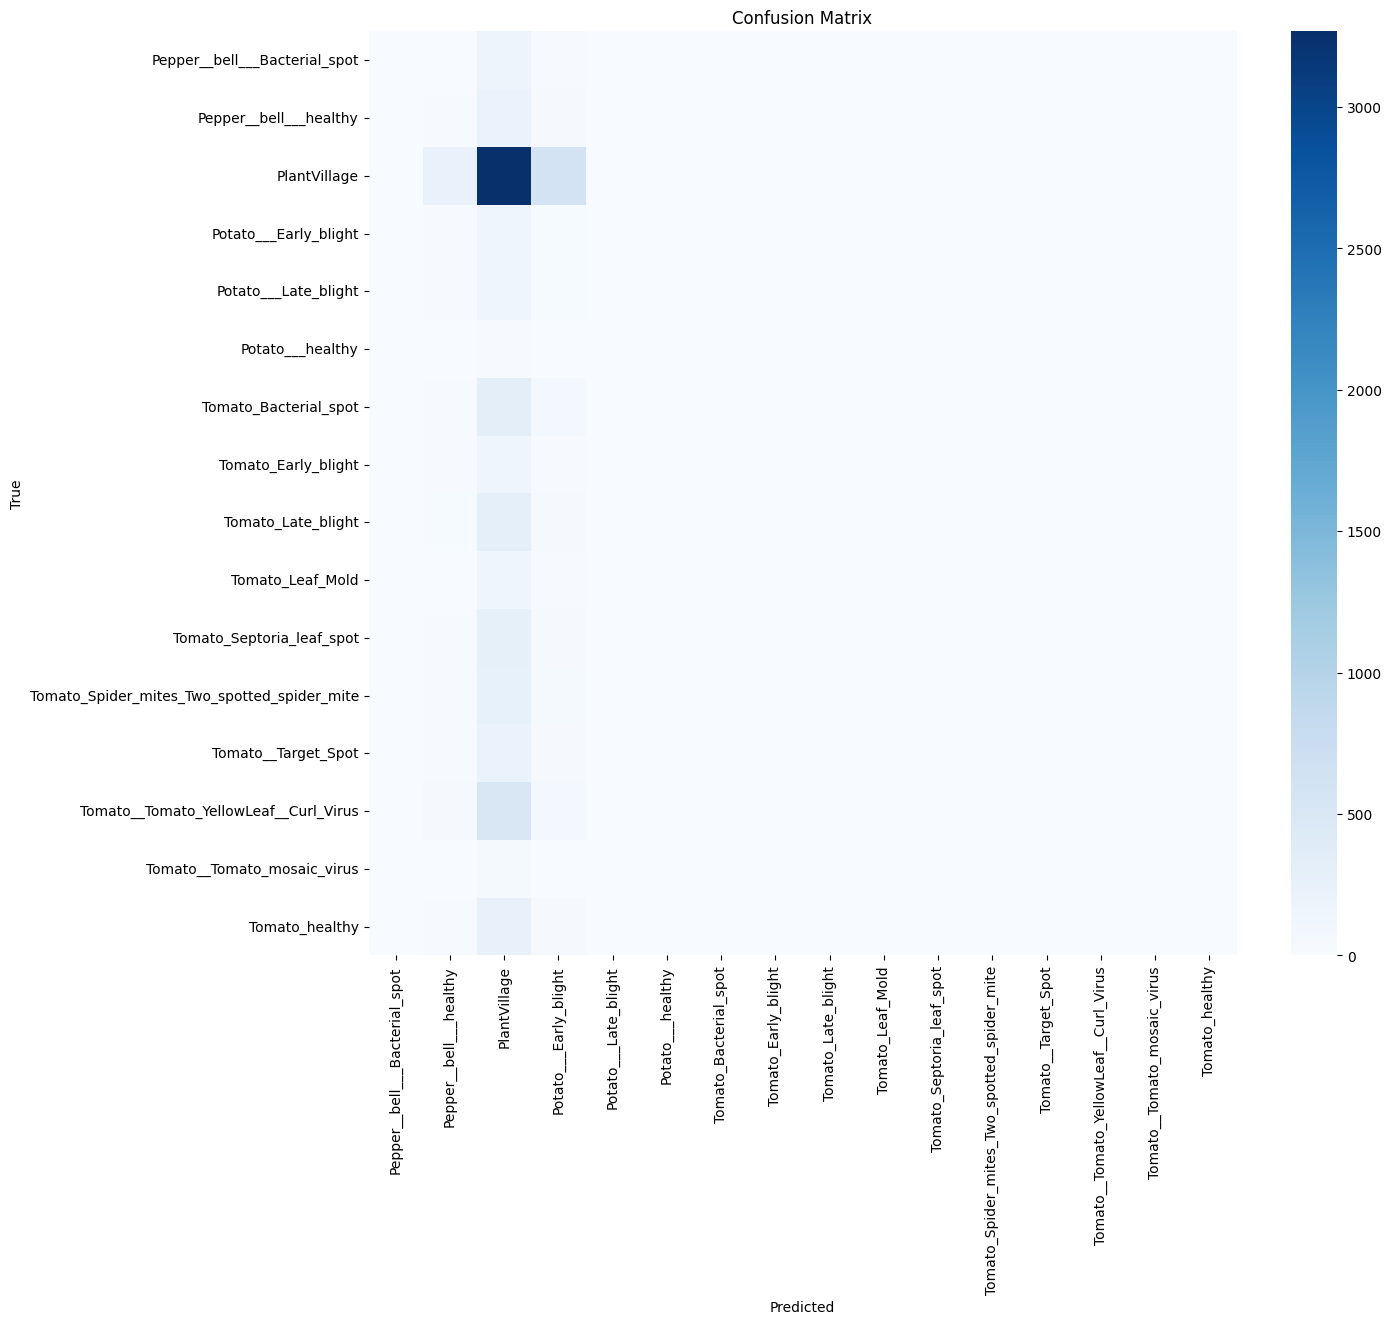

In [ ]:
# Classification Report and Confusion matrix
val_preds = model.predict(val_data)
y_pred = np.argmax(val_preds, axis=1)
y_true = val_data.classes

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=val_data.class_indices.keys()))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(14, 12))
sns.heatmap(cm, cmap="Blues", xticklabels=val_data.class_indices.keys(), yticklabels=val_data.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


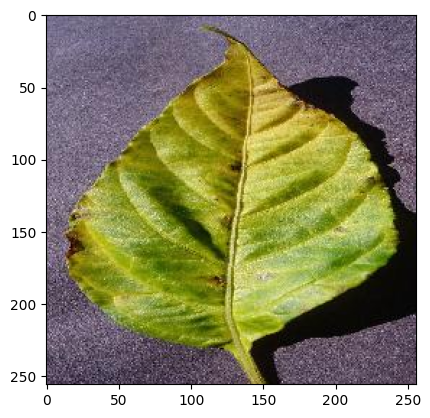

Predicted Class: Potato___Early_blight


In [21]:
#Predict the image
from tensorflow.keras.preprocessing import image
import numpy as np

# Set image size used in training
img_height, img_width = 64,64 # or whatever you used

# Load and preprocess image
img_path = "E:/Plant-Disease-Detection/PlantVillage/Pepper__bell___Bacterial_spot/ff7d08df-7fca-4a2e-a2f4-b196a19e6442___JR_B.Spot 3237.JPG"  # change this path to your test image
show_img=image.load_img("E:/Plant-Disease-Detection/PlantVillage/Pepper__bell___Bacterial_spot/ff7d08df-7fca-4a2e-a2f4-b196a19e6442___JR_B.Spot 3237.JPG")
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
pred = model.predict(img_array)
predicted_class_index = np.argmax(pred)

# Get class labels from the training data
class_labels = list(train_data.class_indices.keys())
predicted_label = class_labels[predicted_class_index]

plt.imshow(show_img)
plt.show()

print("Predicted Class:", predicted_label)